# Import Libraries

In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy.contrasts import Sum
import warnings

In [231]:
from __future__ import division, print_function
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

## Generate dataset
* Dataset includes different smartphone key features and a conjoint analysis survey where participants choose their preferred smartphone 

In [232]:
brand = ["samusang", "Hauweii", "apple", "Gtel", "Itel"]
screen_size=["large","medium", "small"]

data = {
    'brand': np.random.choice(brand, 50),
    'screen_size': np.random.choice(screen_size, 50),
    'storage': np.random.randint(100,500,50),
    'ram_size': np.random.randint(2,8,50),
    'battery(mph)': np.random.randint(100,1000,50),
    'camera(pixels)' : np.random.randint(10,100,50),
    'price(usd)': np.random.randint(60,1000,50),
    'preference': np.random.randint(0,11, 50)
}
df = pd.DataFrame(data)

In [233]:
#Export generated data to csv
df.to_csv("dataset/smartphones.csv", index=False)

#Import saved csv file
smartphones = pd.read_csv("dataset/smartphones.csv")

## Explore and clean data

In [234]:
smartphones.head(20)

,brand,screen_size,storage,ram_size,battery(mph),camera(pixels),price(usd),preference
0,apple,large,196,6,852,49,465,5
1,Hauweii,large,376,6,680,87,571,1
2,apple,large,224,2,628,57,684,9
3,Hauweii,small,272,2,167,98,447,4
4,apple,small,492,4,684,40,578,2
5,Itel,large,411,6,970,78,99,8
6,Gtel,medium,367,6,622,41,318,9
7,Itel,small,415,7,532,49,614,1
8,Gtel,medium,331,4,161,93,119,3
9,apple,large,478,2,646,67,734,7


In [235]:
smartphones.columns

Index(['brand', 'screen_size', 'storage', 'ram_size', 'battery(mph)',
       'camera(pixels)', 'price(usd)', 'preference'],
      dtype='object')

<Axes: xlabel='preference'>

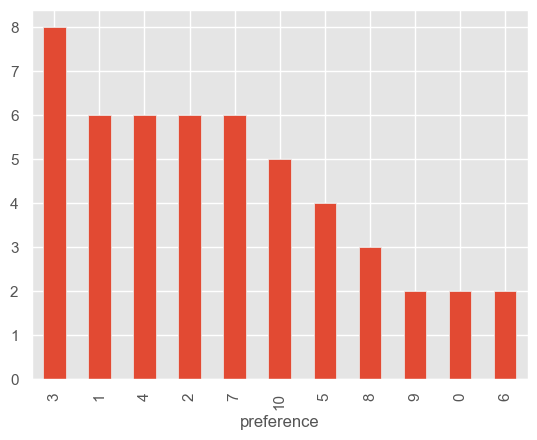

In [236]:
smartphones.preference.value_counts().plot(kind='bar')

In [237]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           50 non-null     object
 1   screen_size     50 non-null     object
 2   storage         50 non-null     int64 
 3   ram_size        50 non-null     int64 
 4   battery(mph)    50 non-null     int64 
 5   camera(pixels)  50 non-null     int64 
 6   price(usd)      50 non-null     int64 
 7   preference      50 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 3.3+ KB


In [238]:
smartphones.isna().sum()

brand             0
screen_size       0
storage           0
ram_size          0
battery(mph)      0
camera(pixels)    0
price(usd)        0
preference        0
dtype: int64

### Using pair plot and preference as our hue we can see most prefered features 

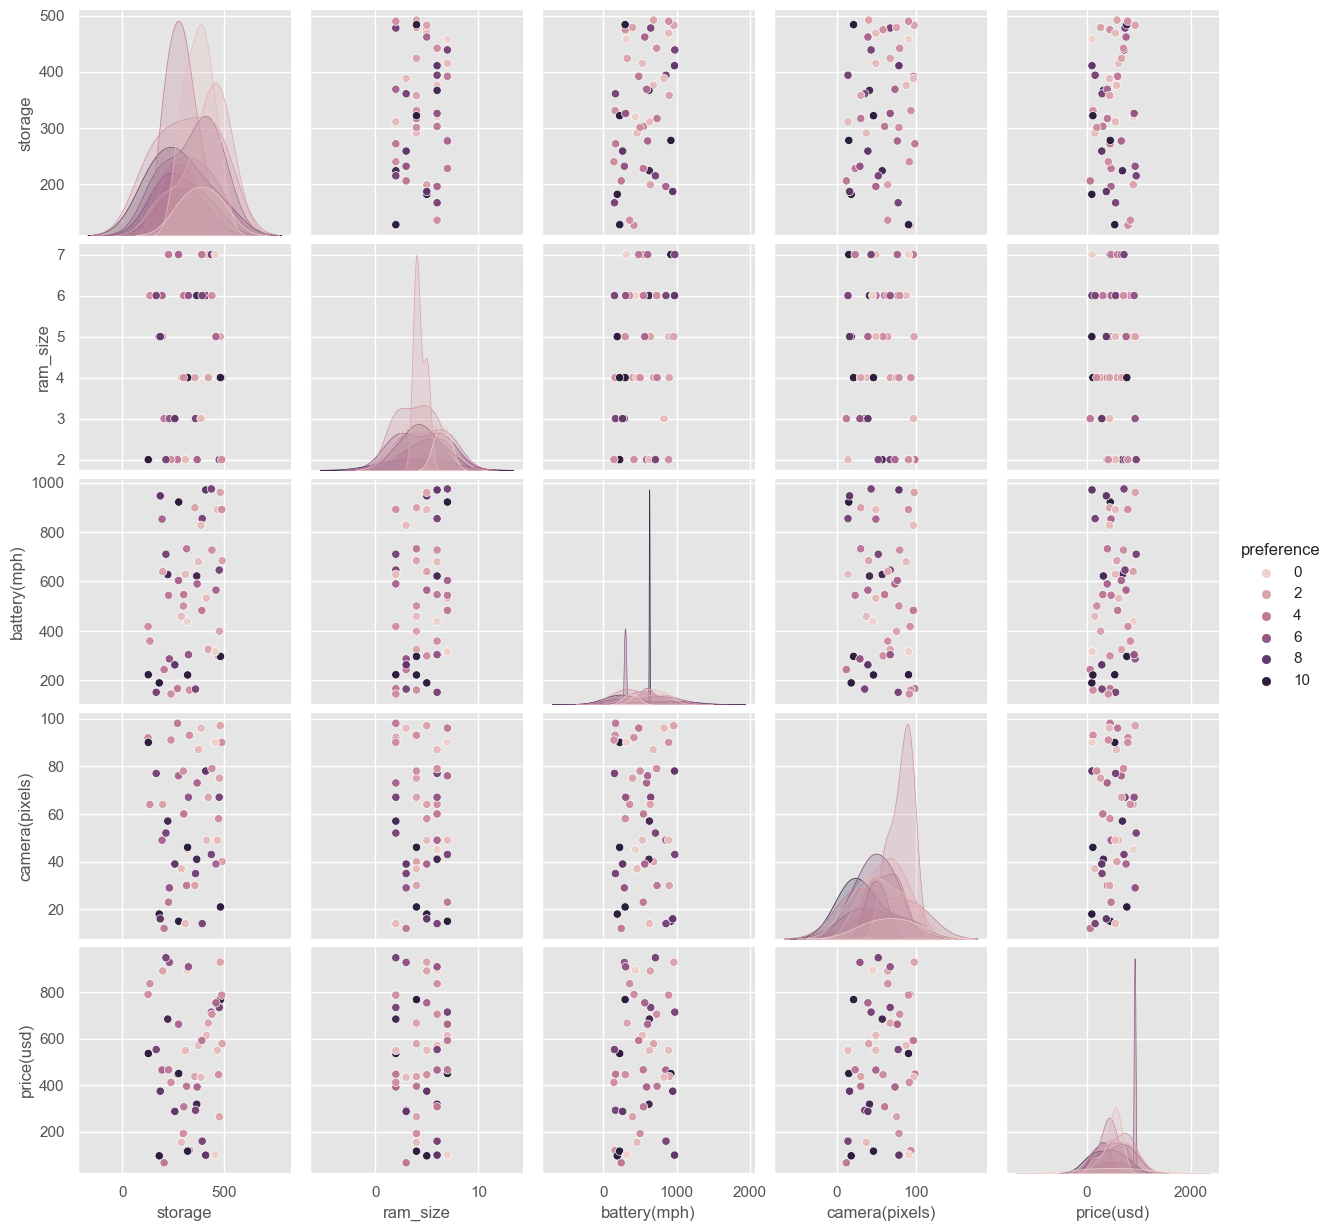

In [239]:
sns.pairplot(data=smartphones, hue="preference")

In [240]:
var = ['storage', 'ram_size', 'battery(mph)',
 'camera(pixels)', 'price(usd)', 'preference']
smartphones_corr = smartphones[var].corr()
smartphones_corr

,storage,ram_size,battery(mph),camera(pixels),price(usd),preference
storage,1.000000,0.150318,0.305965,0.118754,0.022053,-0.277974
ram_size,0.150318,1.000000,0.239527,-0.106676,-0.036916,-0.062911
battery(mph),0.305965,0.239527,1.000000,-0.122295,0.183111,-0.083357
camera(pixels),0.118754,-0.106676,-0.122295,1.000000,0.158405,-0.327076
price(usd),0.022053,-0.036916,0.183111,0.158405,1.000000,-0.122983
preference,-0.277974,-0.062911,-0.083357,-0.327076,-0.122983,1.000000


<Axes: >

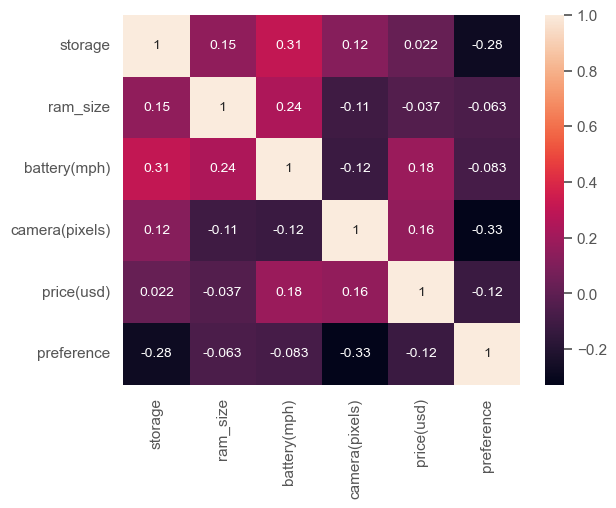

In [241]:
sns.heatmap(smartphones_corr, annot=True)

## Running Linear Regression To Identify Features that Have the Most Impact on Ranking 

In [242]:
smartphones_dum = pd.get_dummies(smartphones.iloc[:,:-1], columns=smartphones.iloc[:,:-1].columns)
smartphones_dum = smartphones_dum.astype(int)
smartphones_dum.head(20)

,brand_Gtel,brand_Hauweii,brand_Itel,brand_apple,brand_samusang,screen_size_large,screen_size_medium,screen_size_small,storage_127,storage_128,storage_136,storage_167,storage_182,storage_187,storage_196,storage_199,storage_206,storage_215,storage_224,storage_228,storage_232,storage_240,storage_259,storage_272,storage_277,storage_278,storage_291,storage_301,storage_303,storage_311,storage_317,storage_320,storage_322,storage_326,storage_331,storage_358,storage_361,storage_367,storage_369,storage_376,storage_388,storage_392,storage_394,storage_411,storage_415,storage_424,storage_439,storage_442,storage_458,storage_462,storage_469,storage_475,storage_478,storage_479,storage_483,storage_484,storage_490,storage_492,ram_size_2,ram_size_3,ram_size_4,ram_size_5,ram_size_6,ram_size_7,battery(mph)_145,battery(mph)_152,battery(mph)_161,battery(mph)_165,battery(mph)_167,battery(mph)_190,battery(mph)_222,battery(mph)_223,battery(mph)_244,battery(mph)_263,battery(mph)_287,battery(mph)_297,battery(mph)_299,battery(mph)_304,battery(mph)_316,battery(mph)_325,battery(mph)_359,battery(mph)_399,battery(mph)_418,battery(mph)_438,battery(mph)_459,battery(mph)_483,battery(mph)_501,battery(mph)_532,battery(mph)_544,battery(mph)_547,battery(mph)_565,battery(mph)_590,battery(mph)_604,battery(mph)_622,battery(mph)_628,battery(mph)_629,battery(mph)_640,battery(mph)_646,battery(mph)_680,battery(mph)_684,...,battery(mph)_732,battery(mph)_827,battery(mph)_852,battery(mph)_854,battery(mph)_890,battery(mph)_891,battery(mph)_898,battery(mph)_921,battery(mph)_946,battery(mph)_960,battery(mph)_970,battery(mph)_974,camera(pixels)_12,camera(pixels)_14,camera(pixels)_15,camera(pixels)_16,camera(pixels)_18,camera(pixels)_21,camera(pixels)_23,camera(pixels)_29,camera(pixels)_30,camera(pixels)_35,camera(pixels)_37,camera(pixels)_39,camera(pixels)_40,camera(pixels)_41,camera(pixels)_43,camera(pixels)_45,camera(pixels)_46,camera(pixels)_49,camera(pixels)_52,camera(pixels)_57,camera(pixels)_58,camera(pixels)_60,camera(pixels)_64,camera(pixels)_67,camera(pixels)_73,camera(pixels)_75,camera(pixels)_76,camera(pixels)_77,camera(pixels)_78,camera(pixels)_79,camera(pixels)_87,camera(pixels)_90,camera(pixels)_91,camera(pixels)_92,camera(pixels)_93,camera(pixels)_96,camera(pixels)_97,camera(pixels)_98,price(usd)_66,price(usd)_96,price(usd)_99,price(usd)_101,price(usd)_116,price(usd)_119,price(usd)_154,price(usd)_159,price(usd)_192,price(usd)_264,price(usd)_287,price(usd)_292,price(usd)_307,price(usd)_318,price(usd)_374,price(usd)_392,price(usd)_395,price(usd)_412,price(usd)_434,price(usd)_437,price(usd)_445,price(usd)_447,price(usd)_450,price(usd)_465,price(usd)_466,price(usd)_536,price(usd)_549,price(usd)_550,price(usd)_553,price(usd)_571,price(usd)_578,price(usd)_592,price(usd)_614,price(usd)_662,price(usd)_667,price(usd)_684,price(usd)_705,price(usd)_714,price(usd)_734,price(usd)_754,price(usd)_768,price(usd)_787,price(usd)_790,price(usd)_836,price(usd)_891,price(usd)_894,price(usd)_909,price(usd)_928,price(usd)_929,price(usd)_948
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Performing Ordinary Least Square (OLS) regression analysis

In [243]:
main_effects_model_fit = sm.OLS(smartphones.preference.astype(int), sm.add_constant(smartphones_dum))
result = main_effects_model_fit.fit()

In [244]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             preference   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 22 Mar 2024   Prob (F-statistic):                nan
Time:                        21:59:03   Log-Likelihood:                 1563.0
No. Observations:                  50   AIC:                            -3026.
Df Residuals:                       0   BIC:                            -2930.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5110        inf          0        nan         nan         nan
brand_Gtel             0.5744        inf          0        nan         nan         nan
brand_Hauweii         -0.3826        inf         -0        nan         nan         nan
brand_Itel             0.3482        inf          0        nan         nan         nan
brand_apple            1.3927        inf          0        nan         nan         nan
brand_samusang         0.5783        inf          0        nan         nan         nan
screen_size_large      1.5582        inf          0        nan         nan         nan
screen_size_medium     0.7051        inf          0        nan         nan         nan
screen_size_small      0.2477        inf          0        nan         nan         nan
storage_127           -0.2579        inf         -0        nan         nan         nan
storage_128            1.4773        inf          0        nan         nan         nan
storage_136           -0.4485        inf         -0        nan         nan         nan
storage_167            0.2390        inf          0        nan         nan         nan
storage_182            1.6011        inf          0        nan         nan         nan
storage_187            0.9561        inf          0        nan         nan         nan
storage_196            0.0072        inf          0        nan         nan         nan
storage_199           -0.4317        inf         -0        nan         nan         nan
storage_206           -0.0443        inf         -0        nan         nan         nan
storage_215            0.4155        inf          0        nan         nan         nan
storage_224            0.7109        inf          0        nan         nan         nan
storage_228            0.1861        inf          0        nan         nan         nan
storage_232            0.1859        inf          0        nan         nan         nan
storage_240           -0.5855        inf         -0        nan         nan         nan
storage_259            0.9669        inf          0        nan         nan         nan
storage_272            0.2324        inf          0        nan         nan         nan
storage_277            0.0402        inf          0        nan         nan         nan
storage_278            1.5603        inf          0        nan         nan         nan
storage_291           -0.8386        inf         -0        nan         nan         nan
storage_301           -0.4299        inf         -0        nan         nan         nan
storage_303           -0.3074        inf         -0        nan         nan         nan
storage_311           -0.8650        inf         -0        nan         nan         nan
storage_317            0.2539        inf          0        nan         nan         nan
storage_320           -0.9798        i

In [245]:
data_res = pd.DataFrame({'name': result.params.keys(),
                         'weight': result.params.values,
                         'p_val': result.pvalues})
data_res = data_res[1:]

In [246]:
data_res

,name,weight,p_val
brand_Gtel,brand_Gtel,0.574417,NaN
brand_Hauweii,brand_Hauweii,-0.382580,NaN
brand_Itel,brand_Itel,0.348196,NaN
brand_apple,brand_apple,1.392701,NaN
brand_samusang,brand_samusang,0.578260,NaN
...,...,...,...
price(usd)_894,price(usd)_894,-0.979801,NaN
price(usd)_909,price(usd)_909,0.649355,NaN
price(usd)_928,price(usd)_928,0.185889,NaN
price(usd)_929,price(usd)_929,-0.456455,NaN


In [254]:
# If the significance level is 5%, it can be seen that all the factors are not statistically significant.
# data_res['abs_weight'] = np.abs(data_res['weight'])
data_res = data_res.sort_values(by='weight')
data = data_res.head(200)
data

,name,weight,p_val
battery(mph)_316,battery(mph)_316,-1.480854,NaN
storage_458,storage_458,-1.480854,NaN
price(usd)_101,price(usd)_101,-1.480854,NaN
camera(pixels)_49,camera(pixels)_49,-1.065837,NaN
camera(pixels)_96,camera(pixels)_96,-1.057438,NaN
storage_388,storage_388,-1.054712,NaN
battery(mph)_827,battery(mph)_827,-1.054712,NaN
price(usd)_434,price(usd)_434,-1.054712,NaN
price(usd)_894,price(usd)_894,-0.979801,NaN
camera(pixels)_45,camera(pixels)_45,-0.979801,NaN


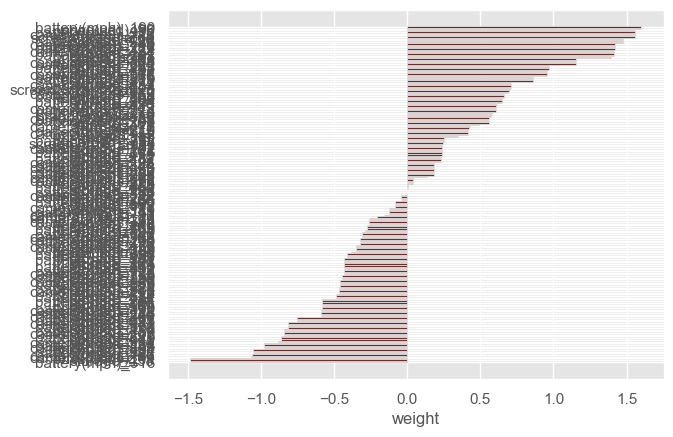

In [255]:
xbar = np.arange(len(data['weight']))
plt.barh(xbar, data['weight'], color = "#682F2F")
plt.yticks(xbar, labels=data['name'])
plt.xlabel('weight')
plt.show()

* In this case, it can be seen that there are factors that are positively related such as weight 100gms,. While other factors like storage_375, camera(pixels)_p4 are negatively related.

In [256]:
from sklearn.preprocessing import StandardScaler

# We will use the data frame where we had created dummy variables scaling all the variables to a range of 0 to 1
X = smartphones_dum
y = smartphones['preference'].astype(int)
# The target variable will be normalized from a ranking to a 1 to 10 score
y = y.apply(lambda x: int(x/len(y)*10))

features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features  

In [257]:
X.head(10)

,brand_Gtel,brand_Hauweii,brand_Itel,brand_apple,brand_samusang,screen_size_large,screen_size_medium,screen_size_small,storage_127,storage_128,storage_136,storage_167,storage_182,storage_187,storage_196,storage_199,storage_206,storage_215,storage_224,storage_228,storage_232,storage_240,storage_259,storage_272,storage_277,storage_278,storage_291,storage_301,storage_303,storage_311,storage_317,storage_320,storage_322,storage_326,storage_331,storage_358,storage_361,storage_367,storage_369,storage_376,storage_388,storage_392,storage_394,storage_411,storage_415,storage_424,storage_439,storage_442,storage_458,storage_462,storage_469,storage_475,storage_478,storage_479,storage_483,storage_484,storage_490,storage_492,ram_size_2,ram_size_3,ram_size_4,ram_size_5,ram_size_6,ram_size_7,battery(mph)_145,battery(mph)_152,battery(mph)_161,battery(mph)_165,battery(mph)_167,battery(mph)_190,battery(mph)_222,battery(mph)_223,battery(mph)_244,battery(mph)_263,battery(mph)_287,battery(mph)_297,battery(mph)_299,battery(mph)_304,battery(mph)_316,battery(mph)_325,battery(mph)_359,battery(mph)_399,battery(mph)_418,battery(mph)_438,battery(mph)_459,battery(mph)_483,battery(mph)_501,battery(mph)_532,battery(mph)_544,battery(mph)_547,battery(mph)_565,battery(mph)_590,battery(mph)_604,battery(mph)_622,battery(mph)_628,battery(mph)_629,battery(mph)_640,battery(mph)_646,battery(mph)_680,battery(mph)_684,...,battery(mph)_732,battery(mph)_827,battery(mph)_852,battery(mph)_854,battery(mph)_890,battery(mph)_891,battery(mph)_898,battery(mph)_921,battery(mph)_946,battery(mph)_960,battery(mph)_970,battery(mph)_974,camera(pixels)_12,camera(pixels)_14,camera(pixels)_15,camera(pixels)_16,camera(pixels)_18,camera(pixels)_21,camera(pixels)_23,camera(pixels)_29,camera(pixels)_30,camera(pixels)_35,camera(pixels)_37,camera(pixels)_39,camera(pixels)_40,camera(pixels)_41,camera(pixels)_43,camera(pixels)_45,camera(pixels)_46,camera(pixels)_49,camera(pixels)_52,camera(pixels)_57,camera(pixels)_58,camera(pixels)_60,camera(pixels)_64,camera(pixels)_67,camera(pixels)_73,camera(pixels)_75,camera(pixels)_76,camera(pixels)_77,camera(pixels)_78,camera(pixels)_79,camera(pixels)_87,camera(pixels)_90,camera(pixels)_91,camera(pixels)_92,camera(pixels)_93,camera(pixels)_96,camera(pixels)_97,camera(pixels)_98,price(usd)_66,price(usd)_96,price(usd)_99,price(usd)_101,price(usd)_116,price(usd)_119,price(usd)_154,price(usd)_159,price(usd)_192,price(usd)_264,price(usd)_287,price(usd)_292,price(usd)_307,price(usd)_318,price(usd)_374,price(usd)_392,price(usd)_395,price(usd)_412,price(usd)_434,price(usd)_437,price(usd)_445,price(usd)_447,price(usd)_450,price(usd)_465,price(usd)_466,price(usd)_536,price(usd)_549,price(usd)_550,price(usd)_553,price(usd)_571,price(usd)_578,price(usd)_592,price(usd)_614,price(usd)_662,price(usd)_667,price(usd)_684,price(usd)_705,price(usd)_714,price(usd)_734,price(usd)_754,price(usd)_768,price(usd)_787,price(usd)_790,price(usd)_836,price(usd)_891,price(usd)_894,price(usd)_909,price(usd)_928,price(usd)_929,price(usd)_948
0,-0.531085,-0.436436,-0.403473,1.687055,-0.531085,0.960769,-0.468521,-0.654654,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,7.000000,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.5,-0.333333,-0.5,-0.403473,1.882938,-0.403473,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142